# SIMPLE LINEAR REGRESSION 
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike 
Build a simple linear regression model by performing EDA and do necessary transformations 
and select the best model using R or Python.

In [1]:
#Part 2- Salary hike

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_sal = pd.read_csv('Salary_data.csv')
data_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#identifiying missing data, describing data
data_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#identify duplicate rows
data_sal[data_sal.duplicated()].shape

(0, 2)

<AxesSubplot:>

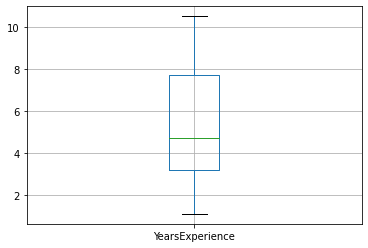

In [5]:
#outliers
data_sal.boxplot(column='YearsExperience')

<AxesSubplot:>

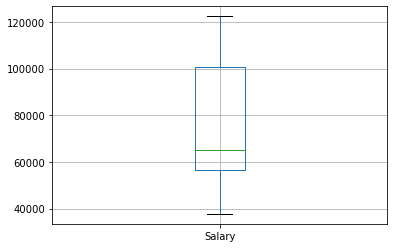

In [6]:
data_sal.boxplot(column='Salary')

Correlation

In [7]:
data_sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


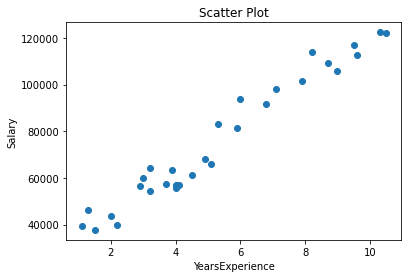

In [8]:
plt.title('Scatter Plot')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(data_sal.YearsExperience,data_sal.Salary)

# Simple Linear Regression Model

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

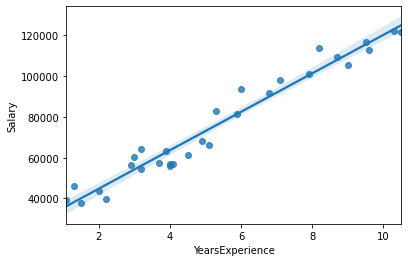

In [9]:
import statsmodels.formula.api as smf
import seaborn as sns

model_sal = smf.ols("Salary~YearsExperience", data = data_sal).fit()
sns.regplot(x="YearsExperience", y="Salary", data=data_sal )

In [10]:
#Coefficients(B0 & B1)
model_sal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [11]:
print('t-Values and p-Values : \n',model_sal.tvalues, '\n', model_sal.pvalues)

t-Values and p-Values : 
 Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [12]:
#R squared values
(model_sal.rsquared, model_sal.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

'''As, p value for YearsExperience is 1.143068e-20 and less than 0.05, so, inddependent var. is significant,
   R^2 value is 0.957 is excellent to predict the Salary from YearsExperience '''

# Predict for new data point (Salary)

In [16]:
#Predict Salary for 10.5 and 21 YearsExperience
newdata = pd.Series([10.5,21])
data_predict = pd.DataFrame(newdata, columns=['YearsExperience'])

data_res = pd.concat([data_predict, pd.DataFrame(model_sal.predict(data_predict), columns=['Salary'])], axis=1)
data_res

,YearsExperience,Salary
0,10.5,125016.804574
1,21.0,224241.408949
